In [13]:
from __future__ import (unicode_literals, print_function, absolute_import,
                        division)


from ema_workbench import (Model, MultiprocessingEvaluator, Policy,
                           Scenario, IntegerParameter)
from ema_workbench.em_framework.evaluators import BaseEvaluator

from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.optimization import (HyperVolume,
                                                     EpsilonProgress)
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.util import ema_logging
import time
from problem_formulation import get_model_for_problem_formulation
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


In [14]:
if __name__ == '__main__':
    ema_logging.log_to_stderr(ema_logging.INFO)

    model, steps = get_model_for_problem_formulation(3)

    reference_values = {'Bmax': 175, 'Brate': 1.5, 'pfail': 0.5,
                        'discount rate 0': 3.5, 'discount rate 1': 3.5,
                        'discount rate 2': 3.5,
                        'ID flood wave shape': 4}
    scen1 = {}

    for key in model.uncertainties:
        name_split = key.name.split('_')

        if len(name_split) == 1:
            scen1.update({key.name: reference_values[key.name]})

        else:
            scen1.update({key.name: reference_values[name_split[1]]})

    ref_scenario = Scenario('reference', **scen1)

In [4]:
#Run scenarios ansd policies random
with MultiprocessingEvaluator(dike_model) as evaluator:
        results = evaluator.perform_experiments(2, 2)

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 2 scenarios * 2 policies * 1 model(s) = 4 experiments
[MainProcess/INFO] 1 cases completed
[MainProcess/INFO] 2 cases completed
[MainProcess/INFO] 3 cases completed
[MainProcess/INFO] 4 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [17]:

convergence_metrics = [EpsilonProgress()]

espilon = [1e3] * len(model.outcomes)
#espilon = [1000000 ,1, 1000000,1,  1000000,1,1000000,1,1000000,1, 1000000,1000000]   

nfe = 5000 # 200 proof of principle only, way to low for actual use

with MultiprocessingEvaluator(model) as evaluator:
        results, convergence = evaluator.optimize(nfe=nfe, searchover='levers',
                                                  epsilons=espilon,
                                                  convergence=convergence_metrics,
                                                  reference=ref_scenario)

[MainProcess/INFO] pool started
[MainProcess/INFO] generation 0: 0/5000 nfe
[MainProcess/INFO] generation 5: 498/5000 nfe
[MainProcess/INFO] generation 10: 994/5000 nfe
[MainProcess/INFO] generation 15: 1494/5000 nfe
[MainProcess/INFO] generation 20: 1994/5000 nfe
[MainProcess/INFO] generation 25: 2492/5000 nfe
[MainProcess/INFO] generation 30: 2988/5000 nfe
[MainProcess/INFO] generation 35: 3488/5000 nfe
[MainProcess/INFO] generation 40: 3985/5000 nfe
[MainProcess/INFO] generation 45: 4484/5000 nfe
[MainProcess/INFO] generation 50: 4979/5000 nfe
[MainProcess/INFO] optimization completed, found 338 solutions
[MainProcess/INFO] terminating pool


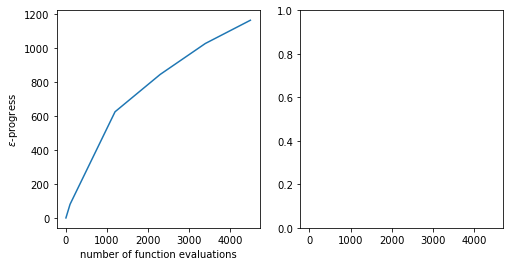

In [22]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(8,4))
ax1.plot(convergence.nfe, convergence.epsilon_progress)
ax1.set_ylabel('$\epsilon$-progress')
ax1.set_xlabel('number of function evaluations')
plt.show()

In [52]:
#Sum the different RfR values to identify the one with 0 for the our municiaplites. identify intresting solutions
results ["sum rfr"] = (results ['0_RfR 0'] + 
                       results ['0_RfR 1'] +
                       results ['0_RfR 2'] +
                       results ['1_RfR 0'] + 
                       results ['1_RfR 1'] +
                       results ['1_RfR 2'] +
                       results ['2_RfR 0'] + 
                       results ['2_RfR 1'] +
                       results ['2_RfR 2'])


int_solutions = results[results['sum rfr']<1]

int_solutions

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,...,A.3 Total Costs,A.3_Expected Number of Deaths,A.4 Total Costs,A.4_Expected Number of Deaths,A.5 Total Costs,A.5_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs,sum Rfr,sum rfr
45,0,0,0,0,0,0,0,0,0,0,...,1.051347e+08,0.000000,3.101399e+07,0.000000,4.027367e+07,0.000000,121200000.0,0.000000,0,0
52,0,0,0,0,0,0,0,0,0,0,...,7.565856e+07,0.060698,3.375375e+07,0.000000,5.359329e+07,0.032144,0.0,0.000000,0,0
91,0,0,0,0,0,0,0,0,0,0,...,7.138092e+07,0.004038,1.917683e+07,0.000000,5.804407e+07,0.000000,633400000.0,0.000000,0,0
96,0,0,0,0,0,0,0,0,0,0,...,9.444945e+07,0.000000,3.424135e+07,0.000000,4.027367e+07,0.000000,0.0,0.000000,0,0
119,0,0,0,0,0,0,0,0,0,0,...,9.444945e+07,0.000000,3.424135e+07,0.000000,1.242269e+08,0.139016,0.0,0.000000,0,0
135,0,0,0,0,0,0,0,0,0,0,...,6.580228e+07,0.039982,7.332080e+06,0.000000,4.376214e+07,0.014789,512200000.0,0.000000,0,0
145,0,0,0,0,0,0,0,0,0,0,...,9.799391e+07,0.000000,1.258646e+07,0.000000,5.617960e+07,0.003852,256100000.0,4227.721346,0,0
147,0,0,0,0,0,0,0,0,0,0,...,7.814710e+07,0.112397,9.159313e+06,0.001068,6.313119e+07,0.007394,256100000.0,0.000000,0,0
153,0,0,0,0,0,0,0,0,0,0,...,9.528530e+07,0.099109,3.375491e+07,0.000000,4.350451e+07,0.018050,256100000.0,0.000000,0,0
157,0,0,0,0,0,0,0,0,0,0,...,8.511197e+07,0.000000,2.544639e+07,0.000083,6.629411e+07,0.000000,0.0,3665.169499,0,0


In [53]:
#identified the lever values that provided those solutions
policies = int_solutions
policies = policies.drop([o.name for o in model.outcomes], axis=1)
policies = policies.drop(["sum Rfr", "sum rfr"], axis=1)
policies

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,...,A.2_DikeIncrease 2,A.3_DikeIncrease 0,A.3_DikeIncrease 1,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2
45,0,0,0,0,0,0,0,0,0,0,...,1,7,3,5,6,1,3,6,0,0
52,0,0,0,0,0,0,0,0,0,0,...,0,0,1,4,5,3,4,0,0,1
91,0,0,0,0,0,0,0,0,0,0,...,0,1,1,4,3,0,4,0,3,1
96,0,0,0,0,0,0,0,0,0,0,...,0,7,1,4,6,2,4,6,0,0
119,0,0,0,0,0,0,0,0,0,0,...,0,7,1,4,6,2,4,0,0,0
135,0,0,0,0,0,0,0,0,0,0,...,0,1,0,4,0,0,2,0,0,3
145,0,0,0,0,0,0,0,0,0,0,...,0,7,2,4,6,0,0,0,0,2
147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,4,0,0,2,0,1,3
153,0,0,0,0,0,0,0,0,0,0,...,7,0,1,5,1,7,4,2,0,0
157,0,0,0,0,0,0,0,0,0,0,...,0,5,1,4,0,3,7,5,0,1


In [54]:
#From the identified levers create a Policy dictionary to be fed to the Multiprocess evaluator
policies_to_evaluate = []

for i, policy in policies.iterrows():
    policies_to_evaluate.append(Policy(str(i), **policy.to_dict()))

# policies_to_evaluate

[Policy({'0_RfR 0': 0, '0_RfR 1': 0, '0_RfR 2': 0, '1_RfR 0': 0, '1_RfR 1': 0, '1_RfR 2': 0, '2_RfR 0': 0, '2_RfR 1': 0, '2_RfR 2': 0, '3_RfR 0': 0, '3_RfR 1': 0, '3_RfR 2': 1, '4_RfR 0': 0, '4_RfR 1': 0, '4_RfR 2': 0, 'EWS_DaysToThreat': 0, 'A.1_DikeIncrease 0': 0, 'A.1_DikeIncrease 1': 0, 'A.1_DikeIncrease 2': 3, 'A.2_DikeIncrease 0': 5, 'A.2_DikeIncrease 1': 2, 'A.2_DikeIncrease 2': 1, 'A.3_DikeIncrease 0': 7, 'A.3_DikeIncrease 1': 3, 'A.3_DikeIncrease 2': 5, 'A.4_DikeIncrease 0': 6, 'A.4_DikeIncrease 1': 1, 'A.4_DikeIncrease 2': 3, 'A.5_DikeIncrease 0': 6, 'A.5_DikeIncrease 1': 0, 'A.5_DikeIncrease 2': 0}),
 Policy({'0_RfR 0': 0, '0_RfR 1': 0, '0_RfR 2': 0, '1_RfR 0': 0, '1_RfR 1': 0, '1_RfR 2': 0, '2_RfR 0': 0, '2_RfR 1': 0, '2_RfR 2': 0, '3_RfR 0': 0, '3_RfR 1': 0, '3_RfR 2': 0, '4_RfR 0': 0, '4_RfR 1': 0, '4_RfR 2': 0, 'EWS_DaysToThreat': 0, 'A.1_DikeIncrease 0': 0, 'A.1_DikeIncrease 1': 0, 'A.1_DikeIncrease 2': 4, 'A.2_DikeIncrease 0': 0, 'A.2_DikeIncrease 1': 4, 'A.2_DikeIncre

In [56]:
#Run scenarios ansd policies random
with MultiprocessingEvaluator(model) as evaluator:
        results = evaluator.perform_experiments(5, policies_to_evaluate)

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 5 scenarios * 32 policies * 1 model(s) = 160 experiments
[MainProcess/INFO] 16 cases completed
[MainProcess/INFO] 32 cases completed
[MainProcess/INFO] 48 cases completed
[MainProcess/INFO] 64 cases completed
[MainProcess/INFO] 80 cases completed
[MainProcess/INFO] 96 cases completed
[MainProcess/INFO] 112 cases completed
[MainProcess/INFO] 128 cases completed
[MainProcess/INFO] 144 cases completed
[MainProcess/INFO] 160 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool
